In [1]:
!pip install --upgrade diffusers transformers accelerate torch safetensors --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.8/461.8 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.7/450.7 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 90.5 MB/s eta 0:00:00


Current device: cuda


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

請輸入想要生成圖片的描述文字 (英文或中文均可): a cute capybara wearing a red hat standing on the moon


  0%|          | 0/25 [00:00<?, ?it/s]

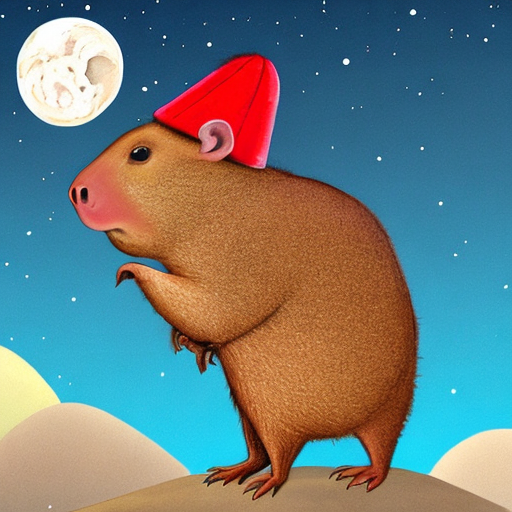

圖片已儲存為 generated_image.png


In [4]:
import torch
from diffusers import StableDiffusionPipeline
import IPython.display as display
from PIL import Image

# 檢查 GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Current device:", device)

# 指定使用的模型 (base 版相對輕量)
model_id = "stabilityai/stable-diffusion-2-1-base"

# 載入模型
# torch_dtype=torch.float16 能在 GPU 上減少記憶體使用
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
).to(device)

# 可選：若覺得安全檢查太嚴，可停用 safety_checker
pipe.safety_checker = lambda images, clip_input: (images, [False] * len(images))


def generate_image_by_text(prompt: str, num_inference_steps=25, guidance_scale=7.5):
    """
    根據文字 prompt 產生圖片，並在 Colab 顯示。
    :param prompt: 文本敘述 (prompt)
    :param num_inference_steps: Diffusion 過程步數，越高品質越好，速度越慢
    :param guidance_scale: 引導強度
    """
    with torch.autocast(device):
        image = pipe(
            prompt=prompt,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale
        ).images[0]
    return image

# 與使用者互動：要求輸入文字，然後生成圖片
user_prompt = input("請輸入想要生成圖片的描述文字 (英文或中文均可): ")

generated_img = generate_image_by_text(user_prompt)

# 顯示圖片
display.display(generated_img)

# 可選：將圖片另存
generated_img.save("generated_image.png")
print("圖片已儲存為 generated_image.png")